# Hierarchal Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

In [3]:
df = pd.read_csv('../Data/cluster_mpg.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [5]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


+ For clustering purpose, `name` is a not a useful field as it is just an unique identifier.
+ for field like `origin` which is categorical, which have to encode into dummy variables.
+ We also can take a look at range as follow. Then we can decide whether to scale or not (depends on whether this field will be used or not for clustering).


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [8]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

## Dummyfy `origin` column

For unsupervised learning, we don't really need to worry about dummy trap. 

In [9]:
df_with_dummies = pd.get_dummies(df.drop('name', axis=1))
df_with_dummies.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1


## Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

As this is unsupervised learning, we don't need to separate Labels and Features as there is no label in the first place.

In [12]:
scaled_data = scaler.fit_transform(df_with_dummies)

In [13]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

## Converting to pandas df to see the scaled version of data

As this is just a numpy array, we can convert it to pandas and see the visualization.

In [14]:
scaled_df = pd.DataFrame(data=scaled_data, columns=df_with_dummies.columns)

In [15]:
scaled_df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0



+ but take note that there is a perfect gradient for `model year`. The reason is it is due to years are in sequence.
+ also `origin_europe`, `origin_japan`, `origin_usa` are in almost white or black, because they are dummies (betwen 0 and 1). That's why they got so correlated.
We just need to take note of those above points.

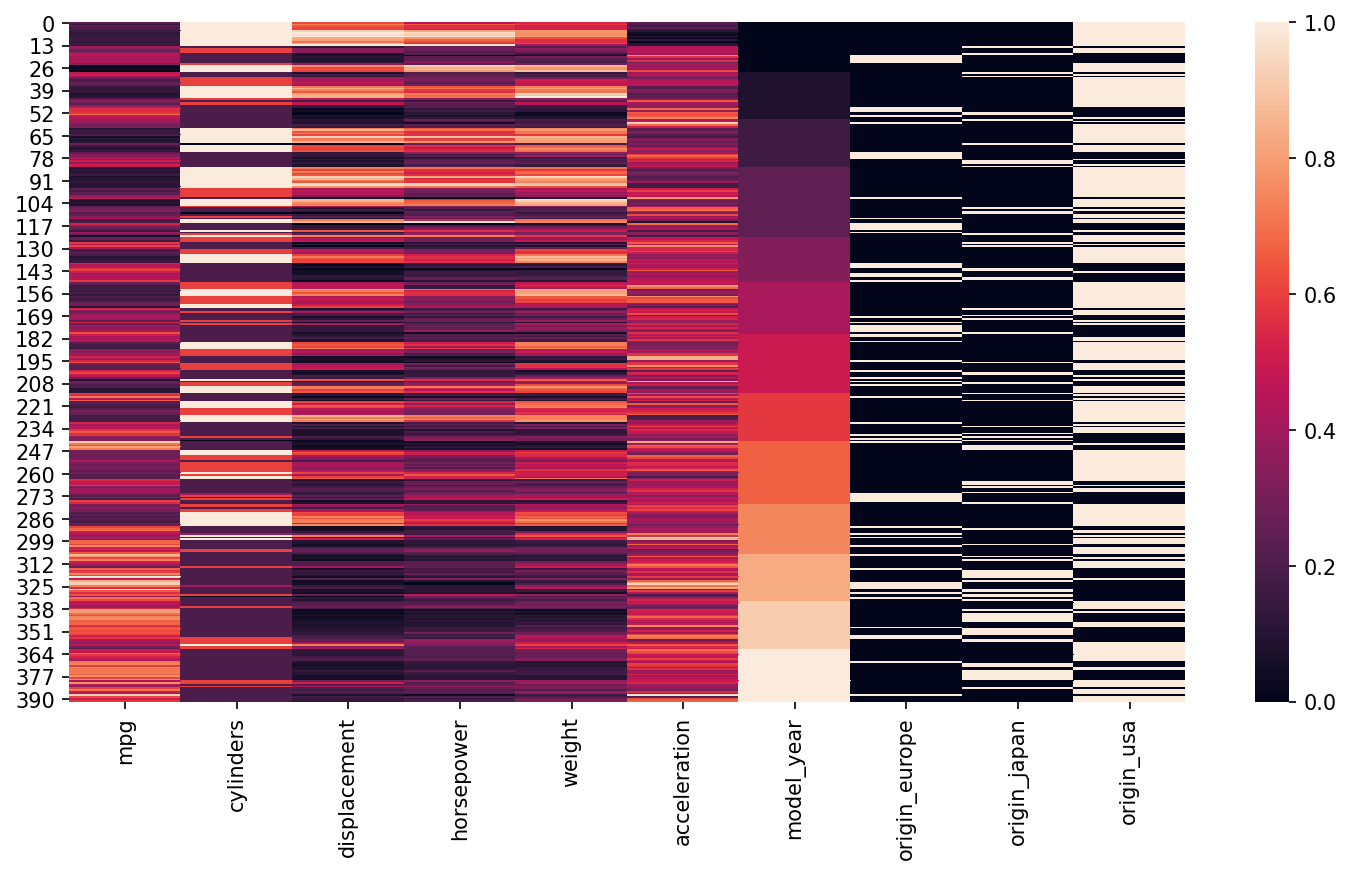

In [21]:
plt.figure(figsize=(12,6), dpi=150)
sns.heatmap(scaled_df);

## What we need to consider during clustering?

We need to consider the true purpose of clustering. Why are we clutering and for which purpose?

For this data set, it is all about cars. And we want to cluster similar clusters together. In this case, every row represent unique cars so we want to cluster rows of the dataset.

We don't want to cluster columns because these are just specifications features.

<Figure size 1800x900 with 0 Axes>

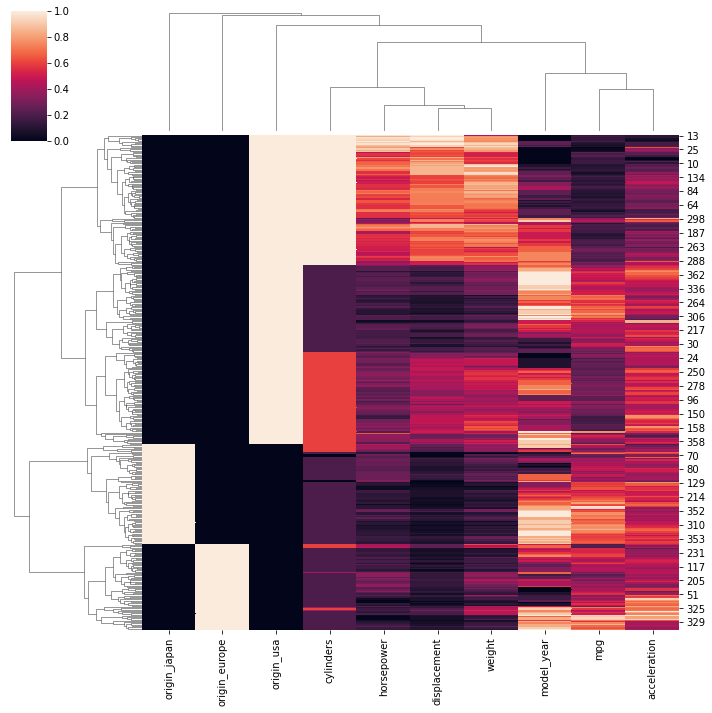

In [23]:
# by default, both rows and columns are clusters.

plt.figure(figsize=(12,6), dpi=150)
sns.clustermap(data=scaled_df);

## Clustering based on column (finding out which features are similar to each other)

We can see features columns are cluster together.

+ Take note that dummy variables columns have the largest distance (longest long of Dendrogram) because they are the furthest from each other. This is because their value are either 0 or 1 which make them very dis-similar from each other.
+ **So in any case if we want to cluster the features, we might want to remove the dummy variables first.**
+ and `displacement` and `weight` are very similar to each other (very short line).

<Figure size 1800x900 with 0 Axes>

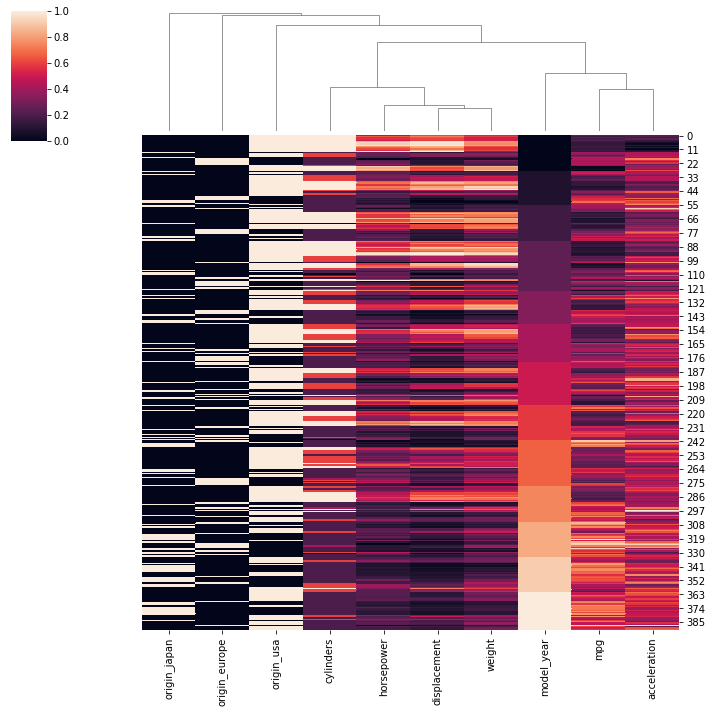

In [28]:
plt.figure(figsize=(12,6), dpi=150)
sns.clustermap(data=scaled_df, row_cluster=False); # we can turn off row_cluster

We can also do this using corr().

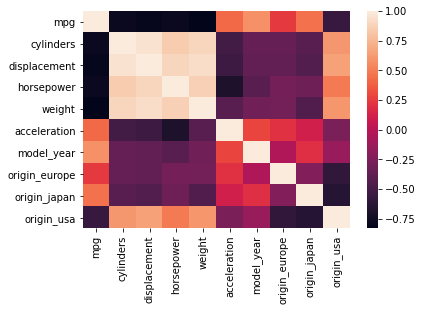

In [30]:
sns.heatmap(scaled_df.corr());

## Clustering based on rows (the way we want)

+ Now we can see there are nice chunks created (`origin_usa`, `origin_europe`, `origin_japan`). 
+ If we look at the clustering group, we can see there are two clusters on highest level (origin usa and origin non-usa cars).
+ if we look at the features, `cylinders` feature has the most chunks.

<Figure size 1800x900 with 0 Axes>

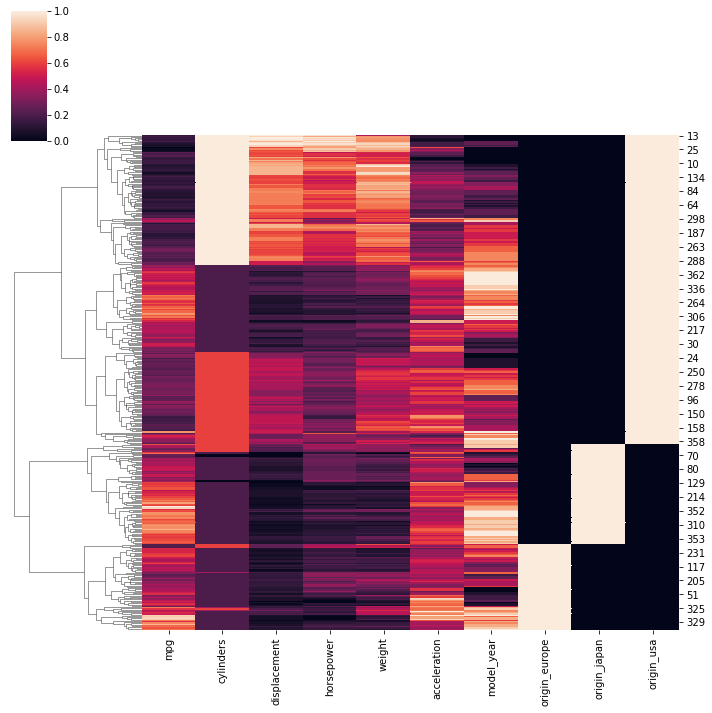

In [27]:
plt.figure(figsize=(12,6), dpi=150)
sns.clustermap(data=scaled_df, col_cluster=False);

----------

## Using Scikit-Learn

# 1) Choosing cluster numbers beforehand

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
model = AgglomerativeClustering(n_clusters=4)

In [34]:
# get the cluster labels
cluster_labels = model.fit_predict(scaled_df)

In [35]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

We can visualize those cluster labels.

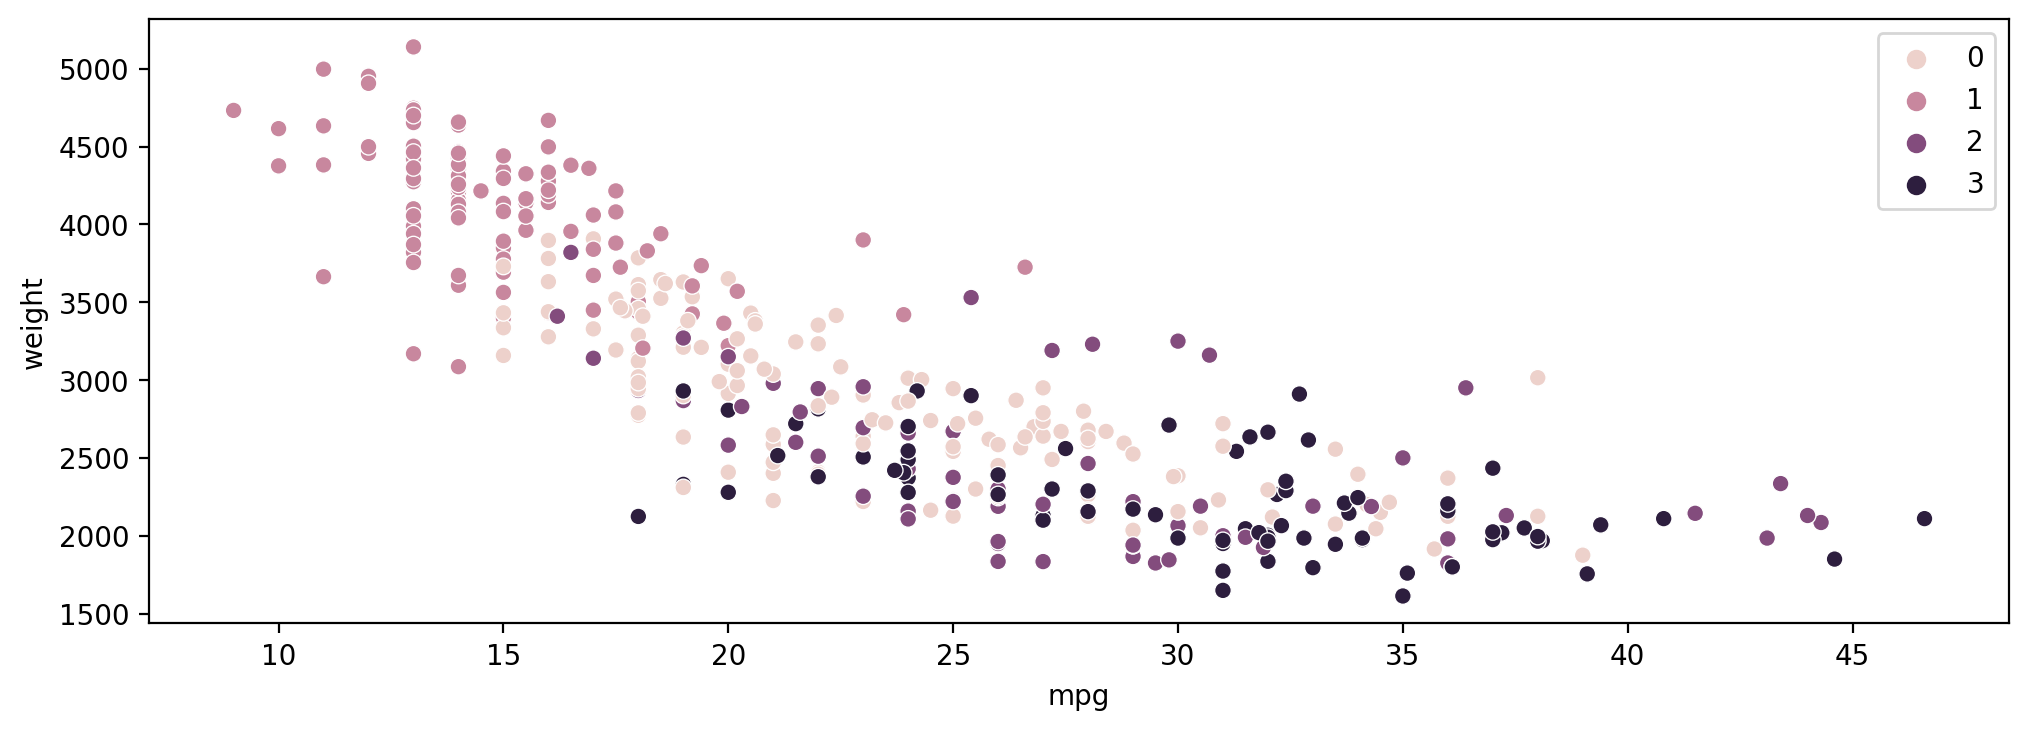

In [39]:
plt.figure(figsize=(12, 4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight', hue=cluster_labels);

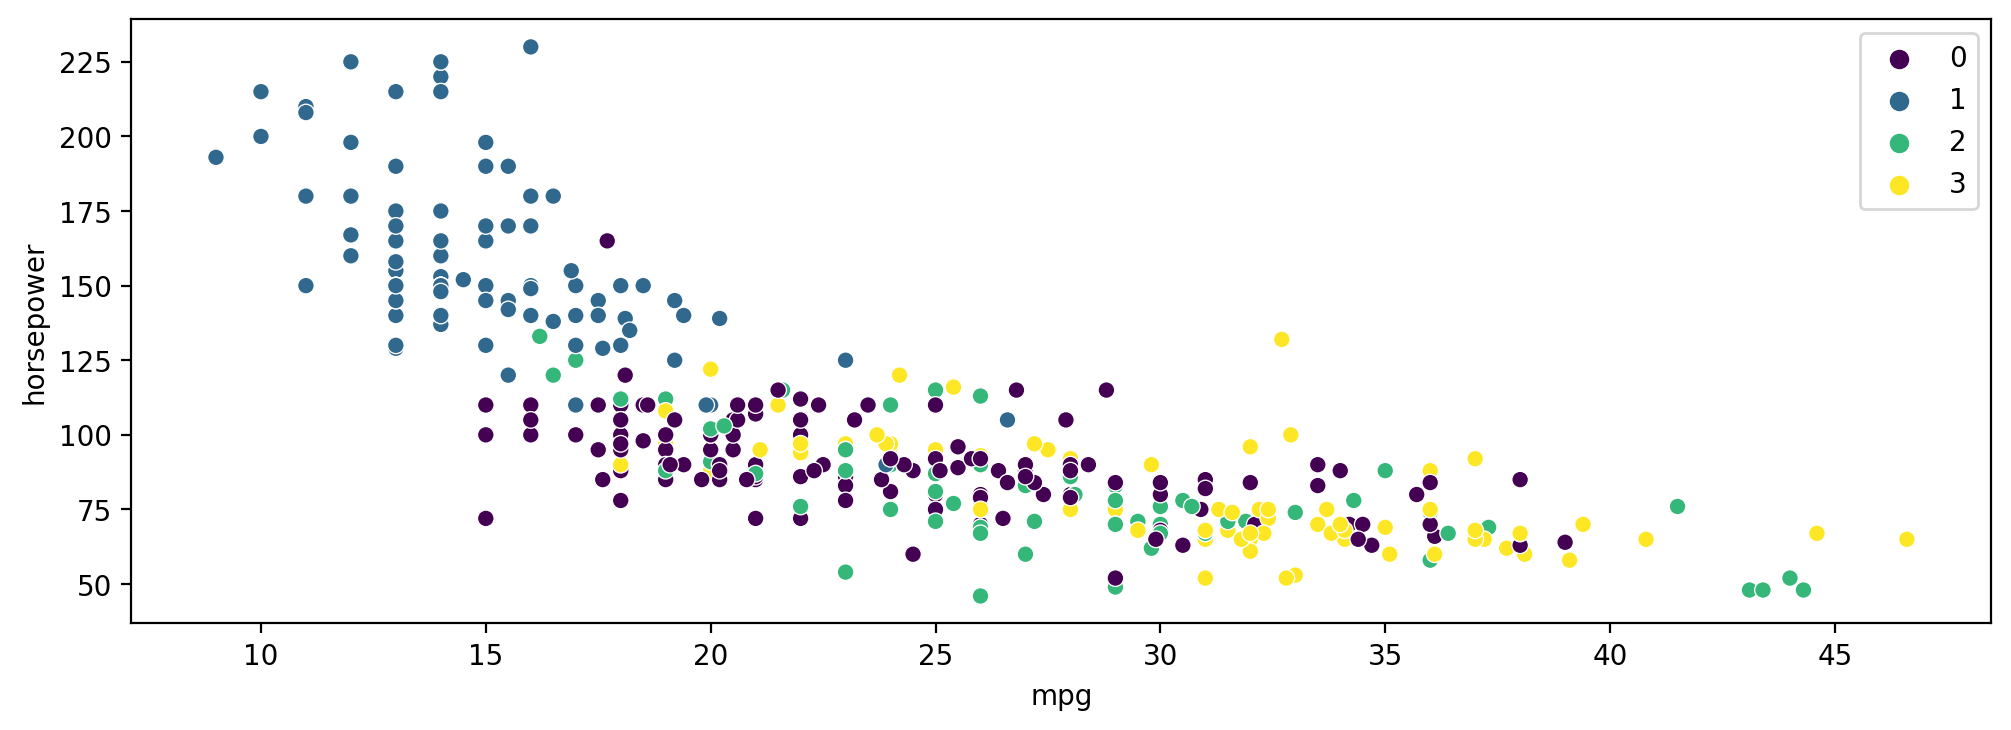

In [41]:
plt.figure(figsize=(12, 4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='horsepower', hue=cluster_labels, palette='viridis');

------

# 2) NOT choosing cluster numbers beforehand

# Exploring Number of Clusters with Dendrograms

Make sure to read the documentation online!
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

#### Assuming every point starts as its own cluster

### Every single points as its own cluster

As we set `distance_threshold` as 0, basically we are trying to get the unique clusters.

In [45]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [46]:
cluster_labels = model.fit_predict(scaled_df)

cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

## Linkage Model

We can see scipy to draw dendrogram.

### Linkage Matrix

Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

    A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

In [47]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [48]:
linkage_matrix = hierarchy.linkage(model.children_)

In [49]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

### How do we interpret the above values?
+ Basically it means Example: first row, first point is 67 and second point is 161. There is a distance of 1.41421356 between two clusters which belonged to larget cluster.
+ We can see that number of points belonged to that specific cluster (represented by 4th column value), it is smaller at first (lowest level of Dendrogram). The values get higher as the level get higher ( a lot of points are under that speicific cluster).
+ At last we can see 391 points are belonged to the highest level of Dendrogram. (the last row)

-------
+ The first two columns are shown on x-axis.
+ The third column is height. (y-axis bar).
+ The fourth column is number of points underneath that cluster.

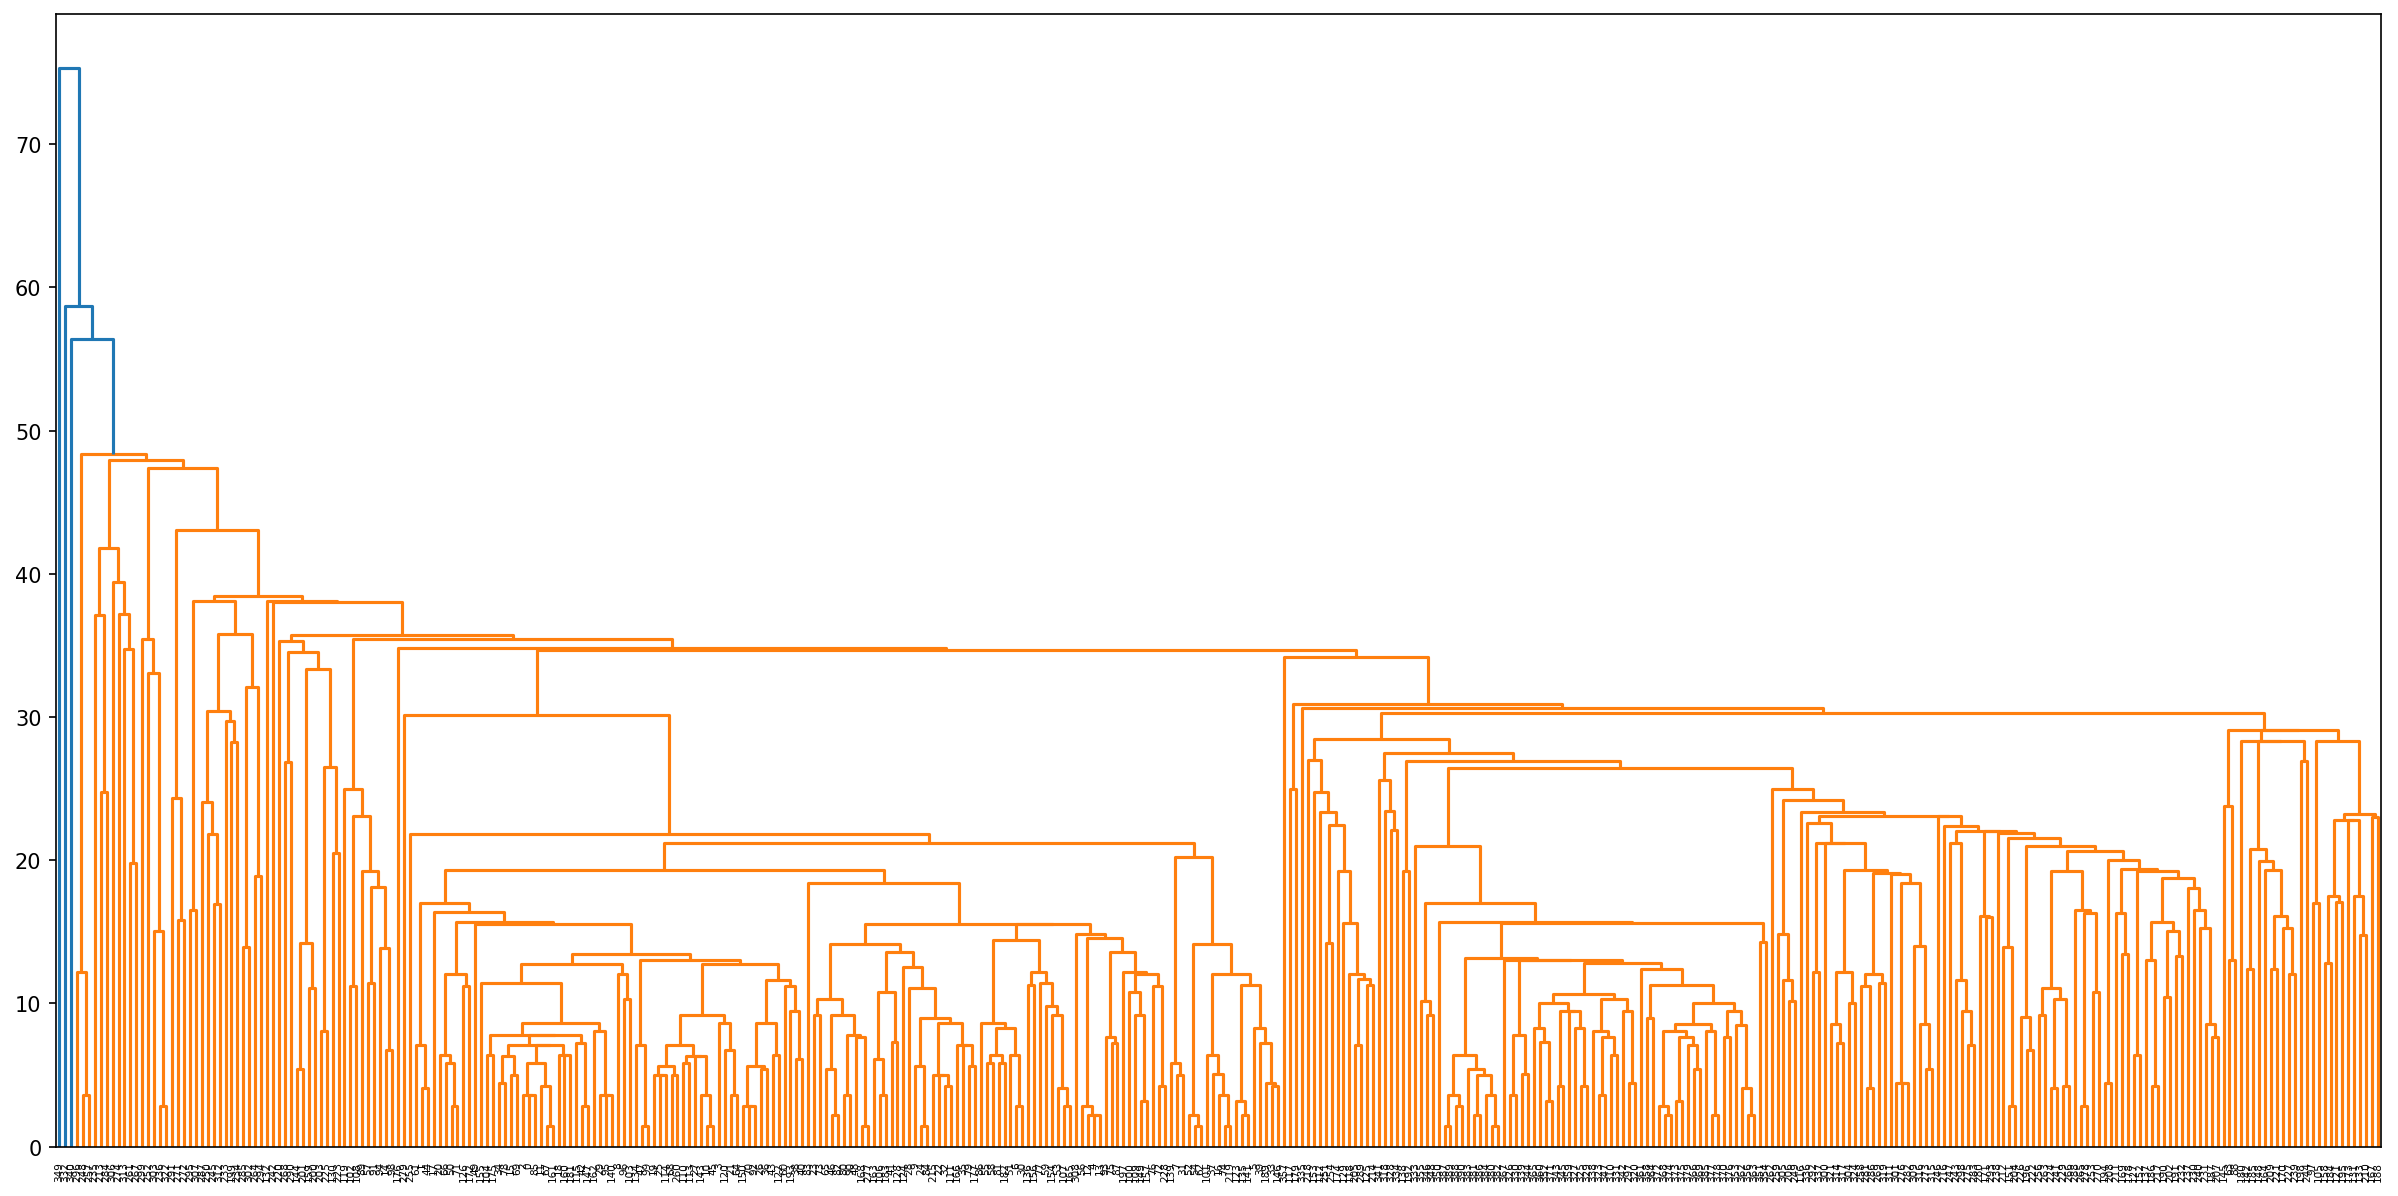

In [50]:
plt.figure(figsize=(20, 10), dpi=150)
dendro = dendrogram(linkage_matrix)

We can cut off the hierarchy by using Truncating mode.

### Truncation Mode

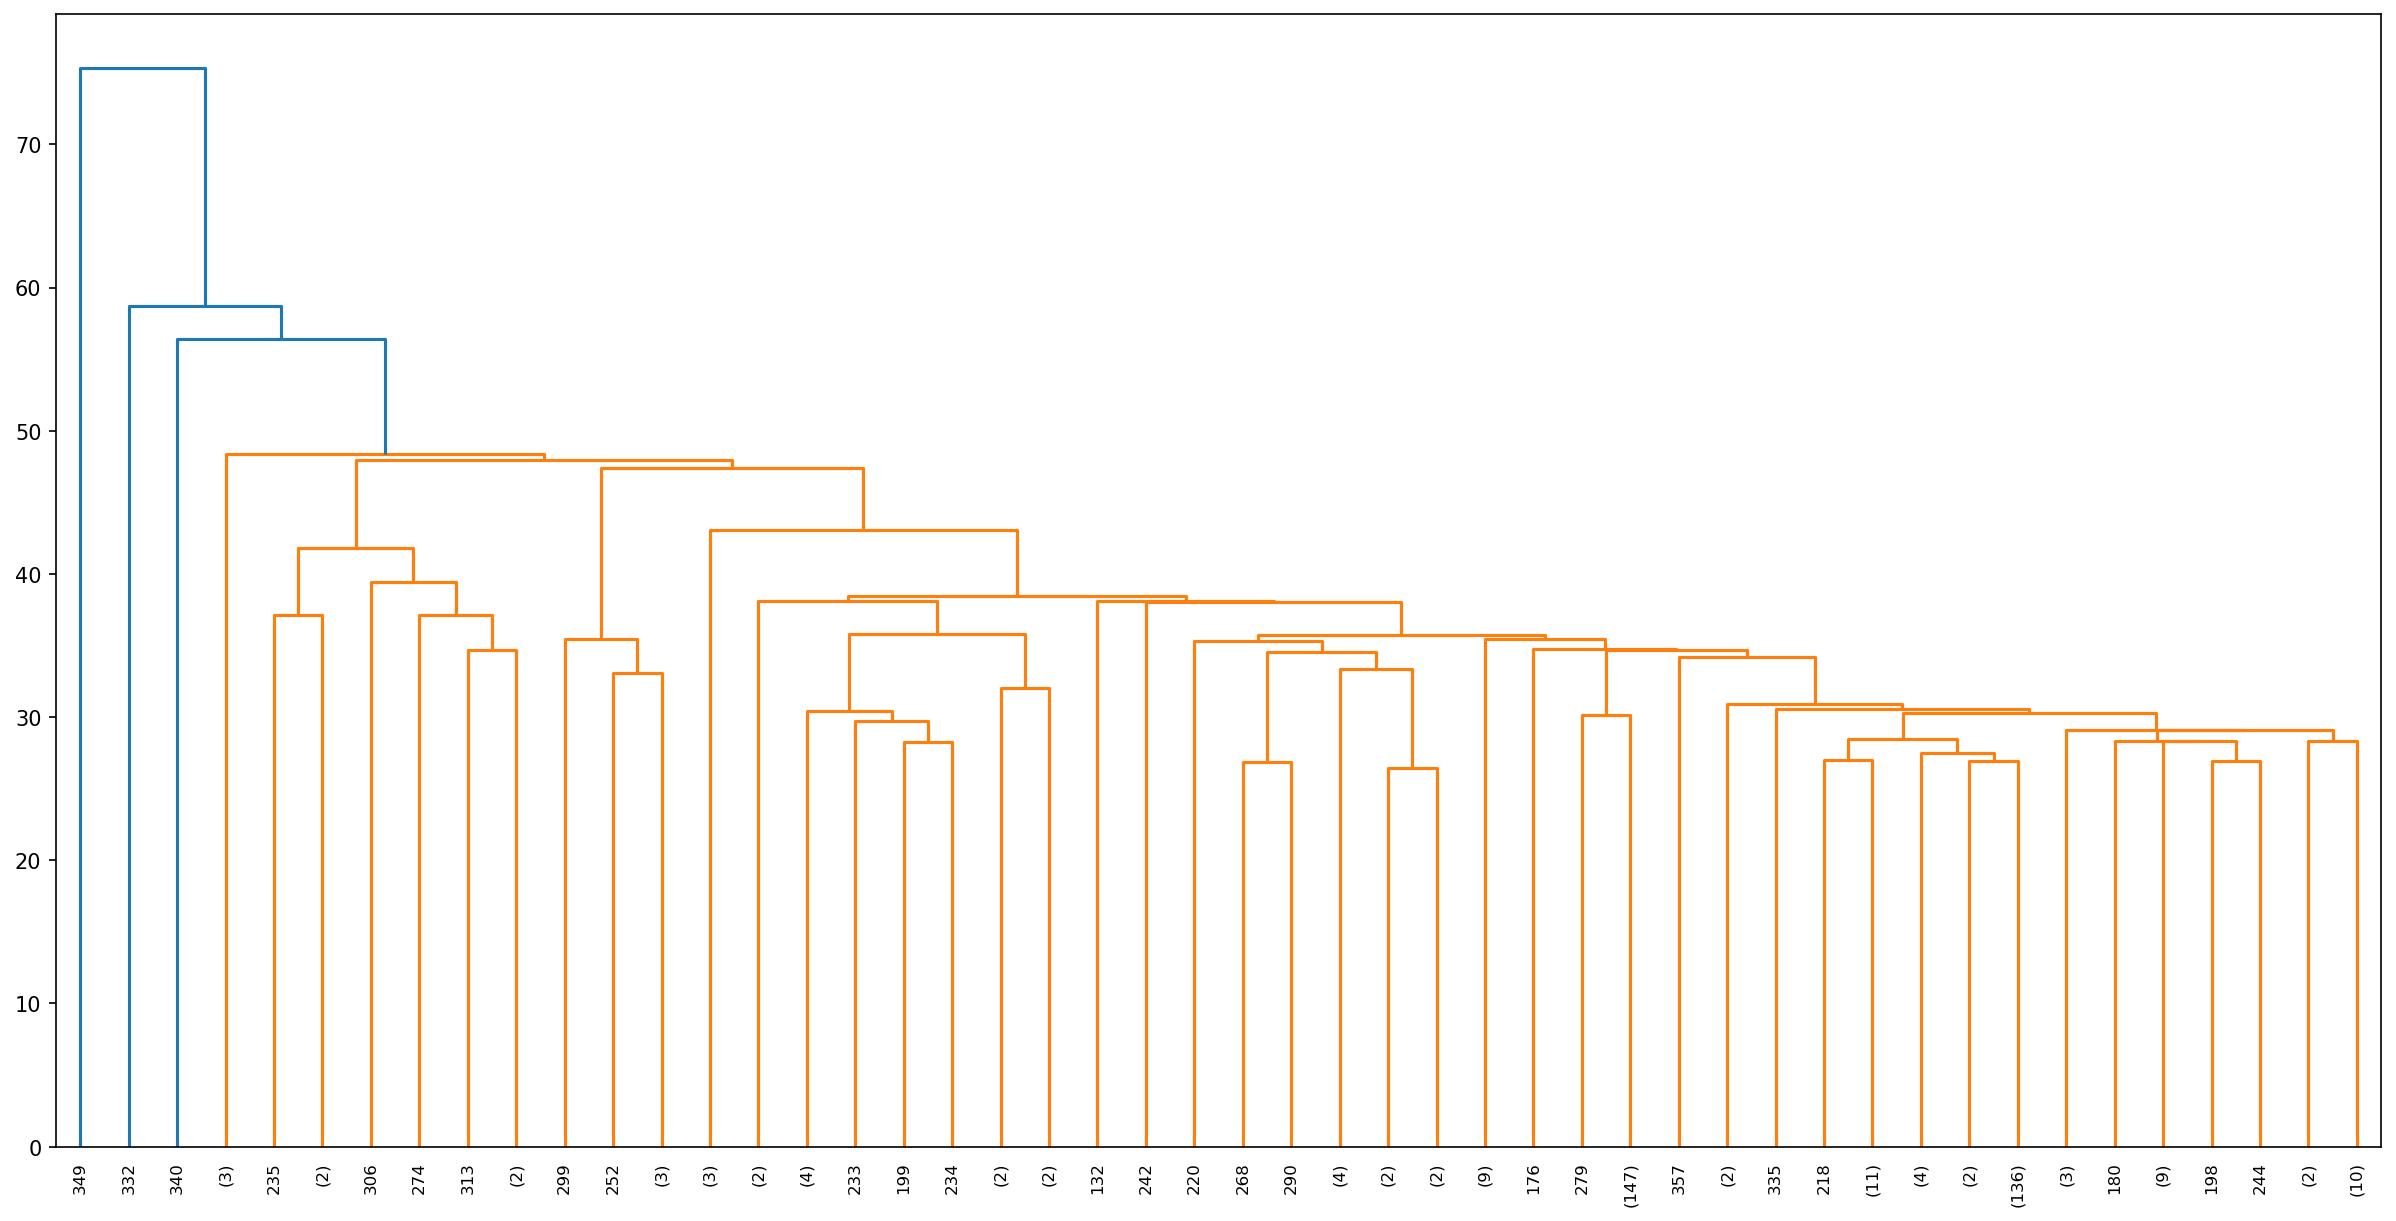

In [52]:
plt.figure(figsize=(20, 10), dpi=150)
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=48)

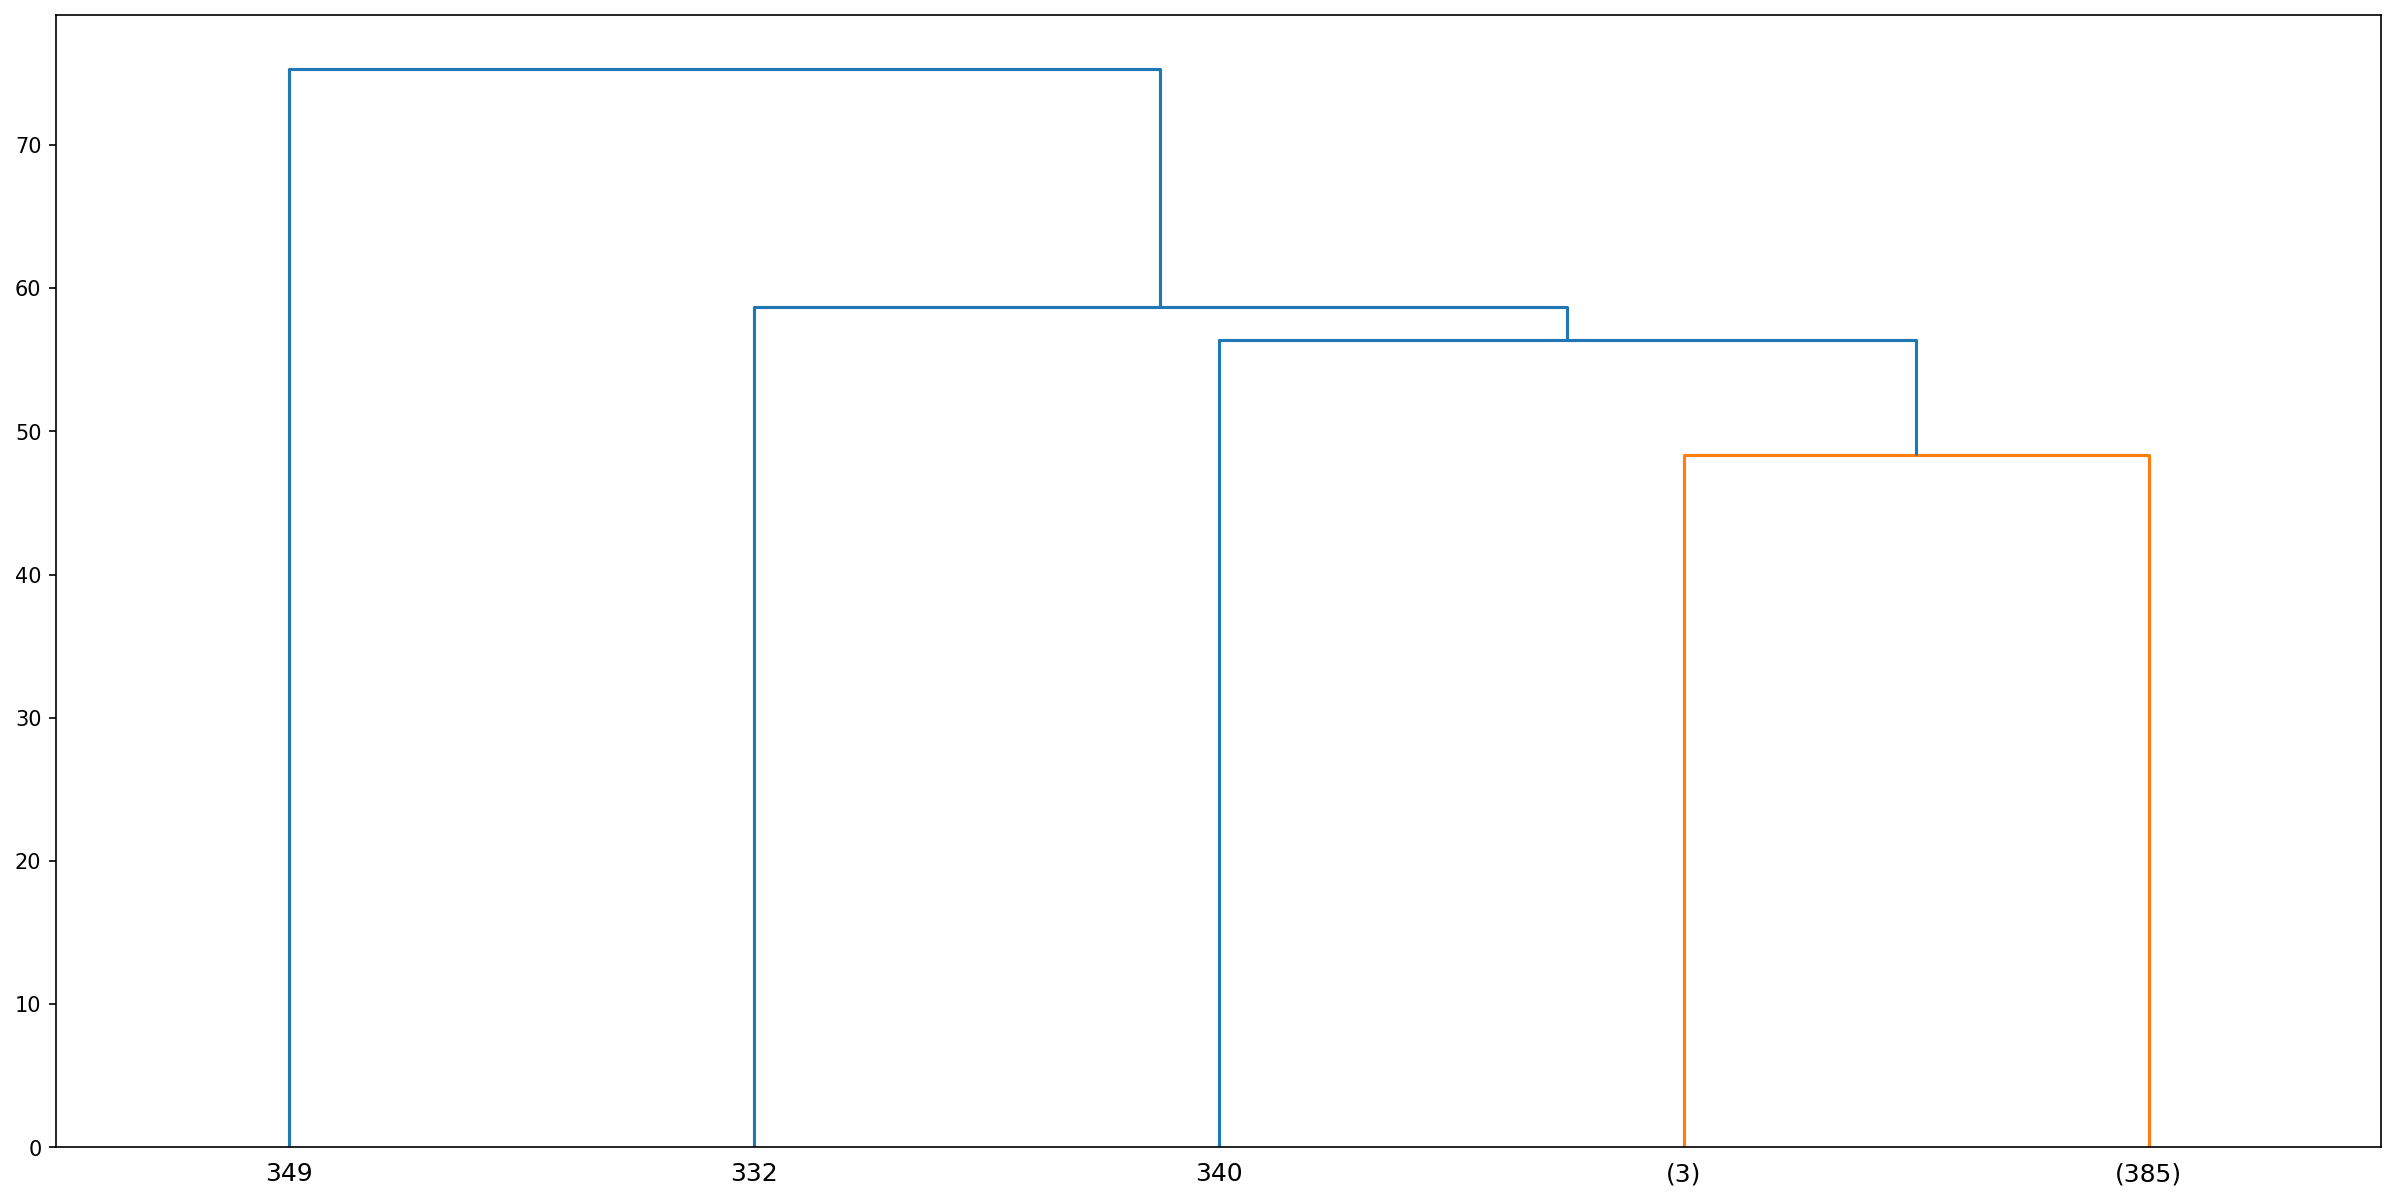

In [53]:
plt.figure(figsize=(20, 10), dpi=150)
dendro = dendrogram(linkage_matrix, truncate_mode='level', p=3)

--------

### Choosing a Threshold Distance

#### Max possible distance?

Recall Euclidean distance: https://en.wikipedia.org/wiki/Euclidean_distance

In [18]:
# What is the max_distance possible?
# it is basically sqrt(N_features)

# so how many features we have?
print(len(scaled_df.columns))

# So what is the max_distance possible?
np.sqrt(10) # MAX DISTANCE POSSIBLE BETWEEN TWO POINTS

10


3.1622776601683795

**What is the distance between two points?**

In [54]:
scaled_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


let's choose `mpg` which is continuous feature after scaling it has max of 1 and min of 0 values.

In [56]:
scaled_df['mpg'].idxmax(), scaled_df['mpg'].idxmin()

# we can see car at 320 has the max of MPG value, other index 28 car has the lowest.

(320, 28)

Let's calculate the distance between Min and Max points which has the largest and smallest value of `mpg`

In [17]:
# https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]
distance = np.linalg.norm(car_a-car_b)

distance

2.3852929970374714

This value is Theoretical value between 2 points.

### NOTE: The distance values between points and Clusters are different

-----

### Creating a Model Based on Distance Threshold

* distance_threshold
    * The linkage distance threshold above which, clusters will not be merged.

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2)

In [24]:
cluster_labels = model.fit_predict(scaled_data)

In [25]:
cluster_labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9